In [29]:
import zipfile
import os

# Define the path to the zipped file and the extraction directory
zip_file_path = r"C:\Users\HP\Desktop\Nexford University\BAN6420\Module 4 Assignment- Netflix Data\netflix_data.zip"  
extraction_path = r"C:\Users\HP\Desktop\Nexford University\BAN6420\Module 4 Assignment- Netflix Data\Unzipped File"

# Unzip the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# List the files in the extraction directory
unzipped_files = os.listdir(extraction_path)
print("Unzipped files:", unzipped_files)


Unzipped files: ['netflix_data.csv']


In [30]:
# Rename the CSV file
for file in unzipped_files:
    if file.endswith('.csv'):  # Assuming the dataset is in CSV format
        old_file_path = os.path.join(extraction_path, file)
        new_file_path = os.path.join(extraction_path, 'Netflix_shows_movies.csv')
        os.rename(old_file_path, new_file_path)
        print(f'Renamed {file} to Netflix_shows_movies.csv')
        break


Renamed netflix_data.csv to Netflix_shows_movies.csv


In [31]:
#
import pandas as pd

# Load the dataset
file_path = r"C:\Users\HP\Desktop\Nexford University\BAN6420\Module 4 Assignment- Netflix Data\Unzipped File\Netflix_shows_movies.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Addressing missing values (example: drop or fill)
df = df.fillna('nill')


        fac     Type                                    Title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   Director  \
0  Richard Finn, Tim Maltby   
1                      Null   
2                      Null   
3                      Null   
4          Fernando Lebrija   

                                                Cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    Country Date_Added  Release_Year  \
0  United Sta

In [33]:
# Data exploration & Statistical Analysis
description = df.describe()
print("Statistical Description:\n", description)

# Check data types and unique values
print("Data Types:\n", df.dtypes)
print("Unique Values:\n", df.nunique())


Statistical Description:
                 fac  Release_Year
count  6.234000e+03    6234.00000
mean   7.670368e+07    2013.35932
std    1.094296e+07       8.81162
min    2.477470e+05    1925.00000
25%    8.003580e+07    2013.00000
50%    8.016337e+07    2016.00000
75%    8.024489e+07    2018.00000
max    8.123573e+07    2020.00000
Data Types:
 fac              int64
Type            object
Title           object
Director        object
Cast            object
Country         object
Date_Added      object
Release_Year     int64
Rating          object
Duration        object
Genre           object
Description     object
dtype: object
Unique Values:
 fac             6234
Type               2
Title           6172
Director        3302
Cast            5470
Country          555
Date_Added      1525
Release_Year      72
Rating            15
Duration         201
Genre            461
Description     6226
dtype: int64


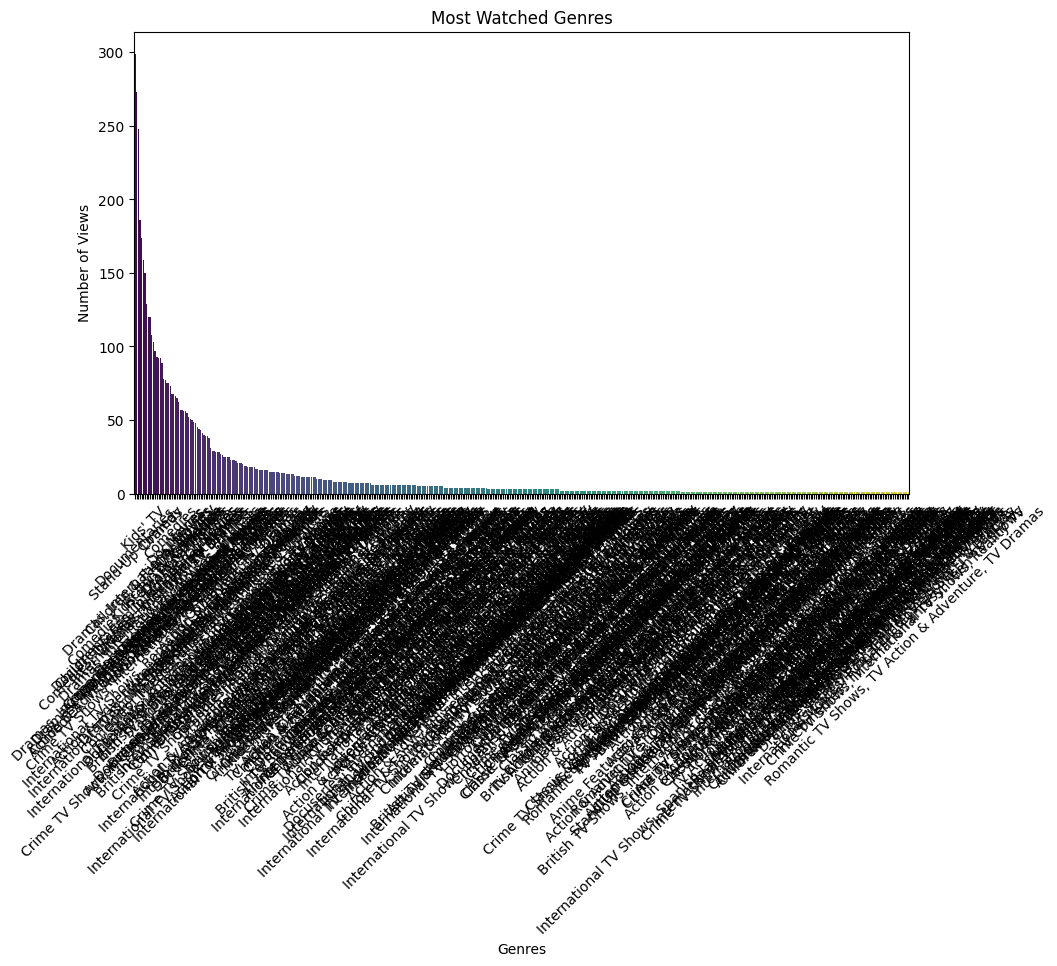

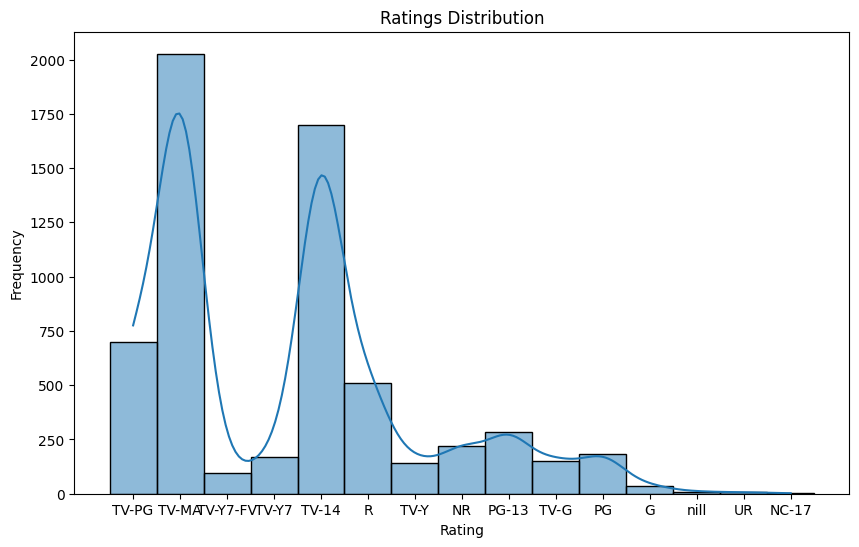

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Most Watched Genres
genre_counts = df['Genre'].value_counts()  # Assuming 'genre' is a column in your dataset
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index.astype(str), y=genre_counts.values, hue=genre_counts.index.astype(str), palette='viridis', legend=False)
plt.title('Most Watched Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Views')
plt.xticks(rotation=45)
plt.show()

# Ratings Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)  # Assuming 'rating' is a column in your dataset
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
